In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
data=pd.read_csv('經濟_final.csv')
data


,year,month,day,網紅博客,網民,匿名,媒體,機構及社群,政界人士,企業品牌,...,manualemo_score,correlation_keyword0,correlation_value0,correlation_keyword1,correlation_value1,correlation_keyword2,correlation_value2,Unnamed: 38,arrival_total,departure_total
0,2020,2,18,12,26,25,16,10,5,0,...,0.393939,中國,13,港澳,9,疫情,8,NaN,465183,132937
1,2020,2,25,5,29,45,46,11,2,1,...,0.000000,香港,22,中國,20,疫情,18,NaN,13521,126032
2,2020,3,3,8,45,60,58,9,12,2,...,0.343750,財政,27,茂波,26,預算案,24,NaN,128259,163492
3,2020,3,10,9,24,45,34,14,2,2,...,0.230769,中國,28,疫情,26,減息,11,NaN,131783,13223
4,2020,3,17,9,35,40,35,11,1,0,...,0.428571,香港,22,中國,18,疫情,16,NaN,207255,94925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2021,7,13,6,4,10,13,3,5,0,...,0.818182,發展,8,香港,6,茂波,3,NaN,14345,21097
74,2021,7,20,2,7,11,10,6,0,0,...,0.714286,香港,7,中國,5,消費券,4,NaN,15132,28681
75,2021,7,27,1,4,8,7,5,3,1,...,1.000000,香港,6,英國,4,美國,4,NaN,17053,22144
76,2021,8,3,1,3,0,2,3,0,0,...,1.000000,香港,4,疫情,2,增長,2,NaN,15967,18593


In [16]:
#Establish the model
x = np.random.uniform(-3.0, 3.0, size=100)
X = np.array(data.loc[:,'author_total']).reshape(-1,1)
y = np.array(data.loc[:,'departure_total']).reshape(-1,)



In [17]:
X = X.astype(np.float64)
y = y.astype(np.float64)

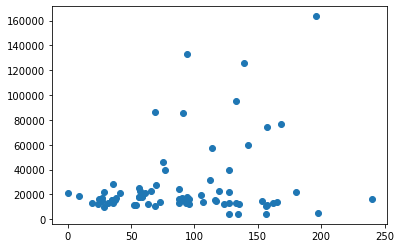

In [18]:
plt.scatter(X,y)

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [24]:
from sklearn.metrics import mean_squared_error

poly_reg = PolynomialRegression(degree=3)
poly_reg.fit(X_train, y_train)

y_poly_predict = poly_reg.predict(X_test)
mean_squared_error(y_test, y_poly_predict)

752328939.0272999

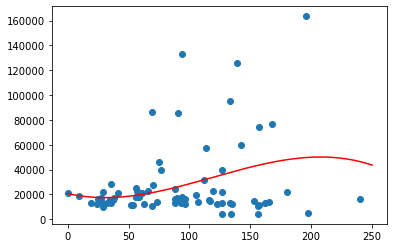

In [25]:
X_plot = np.linspace(0,250, 1000).reshape(1000, 1)
y_plot = poly_reg.predict(X_plot)

plt.scatter(X, y)
plt.plot(X_plot[:,0], y_plot, color='r')
#plt.axis([-3, 3, 0, 6])
plt.show()